# EDA on ethnicities

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

In [6]:
df = pd.read_csv('predictions2.csv', sep=',')

In [7]:
# Data is for registered voters
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,index,district,id,LAST_NAME,FIRST_NAME,zip,female,dob,regyear,party,electiondate,general,typeofvote,age,GEN16,GEN14,Ethnicity Prediction
0,0,0,0,4581539,DUV,103746250,Jennings,Barbara,32225,F,1944-05-23 00:00:00,08/12/2004,REP,11/08/2016,GEN,A,73.0,1,0,Jewish
1,1,1,1,6399633,DUV,103699536,Nellenbach,Marlene,32223,F,1944-07-04 00:00:00,09/03/1996,NPA,11/04/2014,GEN,A,73.0,0,0,Jewish
2,2,2,2,5068762,DUV,103823224,YORK,MARTHA,32246,F,1948-02-10 00:00:00,10/05/1992,REP,11/04/2008,GEN,Y,69.0,0,1,Jewish
3,3,3,3,2390889,CLA,102858200,SUCO,BRANDI,32656,F,1981-09-25 00:00:00,05/16/2000,IDP,11/07/2006,GEN,N,36.0,0,0,African
4,4,4,4,7092052,DUV,103844317,Amato,Lisa,32250,F,1972-09-14 00:00:00,10/01/2004,DEM,11/04/2008,GEN,Y,45.0,0,1,African


Note: results may not be representative given the relatively small sample size.
For example, there are few voters under 30, therefore the proportions look odd on the graph.
Should be fine for this milestone, but will be corrected on a larger dataset.

In [8]:
mean = df.groupby('Ethnicity Prediction').GEN14.mean()


In [10]:
print("Percent of raece at 2014 p")
mean


Percent of raece at 2014 poll


Ethnicity Prediction
African             0.141176
East Asian          0.146199
Eastern European    0.146392
Hispanic            0.158050
Indian              0.214286
Jewish              0.159921
Muslim/Arabic       0.138340
Western European    0.147862
Name: GEN14, dtype: float64

In [12]:
mean = df.groupby('Ethnicity Prediction').GEN16.mean()
print("Percent turnout by race at 2016 p")
mean


Percent of raece at 2016 p


Ethnicity Prediction
African             0.282353
East Asian          0.233918
Eastern European    0.228866
Hispanic            0.245199
Indian              0.217143
Jewish              0.216190
Muslim/Arabic       0.225296
Western European    0.231839
Name: GEN16, dtype: float64

In [29]:
mean = dict(df.groupby('Ethnicity Prediction').GEN16.mean())
y = dict(mean)

In [30]:
(y)

{'African': 0.28235294117647058,
 'East Asian': 0.23391812865497075,
 'Eastern European': 0.22886597938144329,
 'Hispanic': 0.24519940915805022,
 'Indian': 0.21714285714285714,
 'Jewish': 0.21618953603158933,
 'Muslim/Arabic': 0.22529644268774704,
 'Western European': 0.23183925811437403}

In [20]:
y = list(mean)

In [28]:
mean = df.groupby('Ethnicity Prediction').GEN16.mean()
y = list(mean)
N = len(y)
x = range(N)
#x = ("African", "East Asian", "Eastern European", "Hispanic", "Indian", "Jewish", "Muslim/Arabic", "Western European")
width = 1/1.5
plt.bar(x, y, width, color="blue")


<Container object of 8 artists>

In [31]:
dictionary = plt.figure()

D = dict(df.groupby('Ethnicity Prediction').GEN16.mean())

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

([<matplotlib.axis.XTick at 0x106665080>,
 <a list of 8 Text xticklabel objects>)

In [33]:
D = dict(df.groupby('Ethnicity Prediction').GEN16.mean())
plt.bar(*zip(*sorted(D.items())))
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
# Create a list of the mean scores for each variable
mean_values = [df['pre_score'].mean(), df['mid_score'].mean(), df['post_score'].mean()]

# Create a list of variances, which are set at .25 above and below the score
variance = [df['pre_score'].mean() * 0.25, df['pre_score'].mean() * 0.25, df['pre_score'].mean() * 0.25]

# Set the bar labels
bar_labels = ['Pre Score', 'Mid Score', 'Post Score']

# Create the x position of the bars
x_pos = list(range(len(bar_labels)))

# Create the plot bars
# In x position
plt.bar(x_pos,
        # using the data from the mean_values
        mean_values, 
        # with a y-error lines set at variance
        yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#FFC222',
        # alpha 0.5
        alpha=0.5)

# add a grid
plt.grid()

# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('Score')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Each Test')

plt.show()

In [22]:
# Voting by age in 2016
age_groups = ("African", "East Asian", "Eastern European", "Hispanic", "Indian", "Jewish", "Muslim/Arabic", "Western European")

#out = pd.cut(df.age, bins=[0, 29, 40, 50, 60, 1000])
#results = df.groupby(out).GEN16.mean()
results = mean
plt.bar(np.arange(len(age_groups)), y, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_groups)), age_groups)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2016 General Election by Age Groups')
 
plt.show()

ValueError: incompatible sizes: argument 'height' must be length 8 or scalar

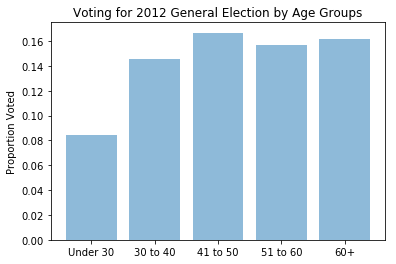

In [7]:
# Voting by age in 2012
age_groups = ('Under 30', '30 to 40', '41 to 50', '51 to 60', '60+')

out = pd.cut(df.age, bins=[0, 29, 40, 50, 60, 1000])
results = df.groupby(out).GEN14.mean()

plt.bar(np.arange(len(age_groups)), results, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_groups)), age_groups)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2012 General Election by Age Groups')
 
plt.show()

In [8]:
# Counts of votes for each type
df['typeofvote'].value_counts()

Y    1976
E    1737
A    1036
N     386
B       8
P       3
Name: typeofvote, dtype: int64

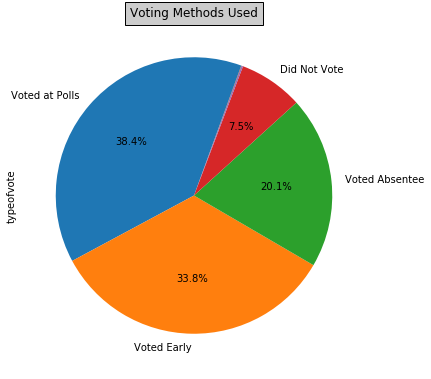

In [9]:
# Understand the breakdown of voting methods for registered voters in elections
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = 'Voted at Polls', 'Voted Early', 'Voted Absentee', 'Did Not Vote', '', ''

# Do not display the percentages of small values - these are votes that do not count
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

df['typeofvote'].value_counts().plot.pie(labels=labels, autopct=my_autopct, startangle=70)
plt.title('Voting Methods Used', bbox={'facecolor':'0.8', 'pad':5})
plt.show()